In [38]:
import pandas as pd

In [39]:
hotels = pd.read_csv('hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [40]:
# Изучение данных в столбце 'hotel_adress'
for i, a in enumerate(hotels['hotel_address'].head(50)):
    print(i, ":", a, "\n")

0 : Stratton Street Mayfair Westminster Borough London W1J 8LT United Kingdom 

1 : 130 134 Southampton Row Camden London WC1B 5AF United Kingdom 

2 : 151 bis Rue de Rennes 6th arr 75006 Paris France 

3 : 216 Avenue Jean Jaures 19th arr 75019 Paris France 

4 : Molenwerf 1 1014 AG Amsterdam Netherlands 

5 : Via Mecenate 121 20138 Milan Italy 

6 : 97 Cromwell Road Kensington and Chelsea London SW7 4DN United Kingdom 

7 : Josefsgasse 4 6 08 Josefstadt 1080 Vienna Austria 

8 : 190 Queen s Gate Kensington and Chelsea London SW7 5EX United Kingdom 

9 : Holland Park Avenue Kensington and Chelsea London W11 4UL United Kingdom 

10 : Molenwerf 1 1014 AG Amsterdam Netherlands 

11 : 34 44 Barkston Gardens Kensington and Chelsea London SW5 0EW United Kingdom 

12 : 16 Sumner Place Kensington and Chelsea London SW7 3EG United Kingdom 

13 : 97 Cromwell Road Kensington and Chelsea London SW7 4DN United Kingdom 

14 : Putget 68 Sarri St Gervasi 08023 Barcelona Spain 

15 : Caspe 103 Eixample

In [41]:
# Извлечение страны из адреса
hotels['country'] = hotels['hotel_address'].str.split().str[-1]
# Кодрование признака страны
hotels['country_code'], unique_countries = pd.factorize(hotels['country'])

In [42]:
print("Уникальные страны:", unique_countries)

Уникальные страны: Index(['Kingdom', 'France', 'Netherlands', 'Italy', 'Austria', 'Spain'], dtype='object')


In [43]:
hotels['country_code'].head()

0    0
1    0
2    1
3    1
4    2
Name: country_code, dtype: int64

In [45]:
# Обработка признака 'days_since_review' 
hotels['days_since_review'] = hotels['days_since_review'].astype(str).str.extract('(\d+)').astype(float)

In [46]:
hotels['days_since_review'].head()

0    531.0
1    203.0
2    289.0
3    681.0
4    516.0
Name: days_since_review, dtype: float64

In [47]:
# Обрабатываем даты
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
hotels['review_year'] = hotels['review_date'].dt.year
hotels['review_month'] = hotels['review_date'].dt.month
hotels['review_day'] = hotels['review_date'].dt.day
hotels['review_weekday'] = hotels['review_date'].dt.weekday


In [48]:
# Удаляем оригинальный столбец с датами
hotels = hotels.drop(columns=['review_date'])

In [49]:
# Изучаем данные в столбце 'tags'
for i, a in enumerate(hotels['tags'].head(50)):
    print(i, ":", a, "\n")


0 : [' Leisure trip ', ' Couple ', ' Studio Suite ', ' Stayed 2 nights ', ' Submitted from a mobile device '] 

1 : [' Business trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night '] 

2 : [' Leisure trip ', ' Solo traveler ', ' Modern Double Room Echo ', ' Stayed 3 nights ', ' Submitted from a mobile device '] 

3 : [' Leisure trip ', ' Solo traveler ', ' Standard Room with 1 Double Bed ', ' Stayed 1 night '] 

4 : [' Business trip ', ' Couple ', ' Standard Double or Twin Room ', ' Stayed 6 nights '] 

5 : [' Business trip ', ' Solo traveler ', ' Superior Twin Room ', ' Stayed 1 night ', ' Submitted from a mobile device '] 

6 : [' Leisure trip ', ' Couple ', ' Double Room Non Smoking ', ' Stayed 1 night ', ' Submitted from a mobile device '] 

7 : [' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 4 nights '] 

8 : [' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night '] 

9 : [' Leisure trip ', ' Couple ', ' Twin Hilton Guest Room ', ' Stayed 1 n

In [50]:
import ast

hotels['tags'] = hotels['tags'].dropna().apply(ast.literal_eval)
hotels_exploded = hotels.dropna(subset=['tags']).explode('tags')
hotels_exploded['tags'] = hotels_exploded['tags'].astype(str).str.strip()
# Подсчитываем количество появлений каждого тега
tag_counts = hotels_exploded['tags'].value_counts()

# Находим тег с наибольшим количеством отзывов
most_common_tag = tag_counts.idxmax()
most_common_count = tag_counts.max()

# Выводим результаты
print("Уникальных тегов:", hotels_exploded['tags'].nunique())
print("Список уникальных тегов:", hotels_exploded['tags'].unique())
print(f"Тег '{most_common_tag}' представлен в наибольшем числе отзывов: {most_common_count}")

Уникальных тегов: 2368
Список: ['Leisure trip' 'Couple' 'Studio Suite' ...
 'Quadruple Room 2 Adults 2 Children' 'Art Deco Room Terrace'
 'Executive Double Room Non Smoking']
Уникальных тегов: 2368
Список уникальных тегов: ['Leisure trip' 'Couple' 'Studio Suite' ...
 'Quadruple Room 2 Adults 2 Children' 'Art Deco Room Terrace'
 'Executive Double Room Non Smoking']
Тег 'Leisure trip' представлен в наибольшем числе отзывов: 313593


In [58]:
# Создаем новый столбец 'leisure_trip', убирая пробелы из тегов
hotels['leisure_trip'] = hotels['tags'].apply(lambda x: 1 if 'Leisure trip' in [tag.strip() for tag in x] else 0)

In [51]:
import re

n = hotels['tags'].astype(str).str.extract(r"Stayed\s+(\d+)\s+night", flags=re.IGNORECASE)[0]
hotels['nights'] = pd.to_numeric(n, errors='coerce').astype('Int64')  # nullable int


counts = hotels['nights'].value_counts().sort_index()
print(counts)
most_common = counts.idxmax()
print("Чаще всего останавливаются на", most_common, "ночь(ей),", counts.loc[most_common], "отзыв(ов),", f"{counts.loc[most_common]/counts.sum():.1%}")

nights
1     145373
2     100263
3      72000
4      35748
5      15611
6       7399
7       5549
8       1910
9        966
10       663
11       306
12       217
13       174
14       184
15        87
16        38
17        27
18        24
19        23
20        17
21        19
22         8
23         6
24         5
25         4
26         6
27        10
28         7
29         3
30        10
Name: count, dtype: Int64
Чаще всего останавливаются на 1 ночь(ей), 145373 отзыв(ов), 37.6%


In [61]:
# Удаляем столбцы с типом данных object
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)

In [62]:
hotels.head()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,country_code,review_year,review_month,review_day,review_weekday,nights,leisure_trip
0,581,8.4,3,1994,4,7,10.0,531.0,51.507894,-0.143671,0,2016,2,19,4,2,1
1,299,8.3,3,1361,2,14,6.3,203.0,51.521009,-0.123097,0,2017,1,12,3,1,0
2,32,8.9,6,406,0,14,7.5,289.0,48.845377,2.325643,1,2016,10,18,1,3,1
3,34,7.5,0,607,11,8,10.0,681.0,48.888697,2.394540,1,2015,9,22,1,1,1
4,914,8.5,4,7586,20,10,9.6,516.0,52.385601,4.847060,2,2016,3,5,5,6,0


In [63]:
from sklearn.impute import SimpleImputer
# Обработка пропущенных значений
numerical_features = hotels.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Создаем импертеры для обработки пропусков
numerical_imputer = SimpleImputer(strategy='mean')
# Применяем импертеры к данным
hotels[numerical_features] = numerical_imputer.fit_transform(hotels[numerical_features])

In [64]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  float64
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  float64
 3   total_number_of_reviews                     386803 non-null  float64
 4   review_total_positive_word_counts           386803 non-null  float64
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  float64
 6   reviewer_score                              386803 non-null  float64
 7   days_since_review                           386803 non-null  float64
 8   lat                                         386803 non-null  float64
 9   lng                                         386803 non-null  float64
 

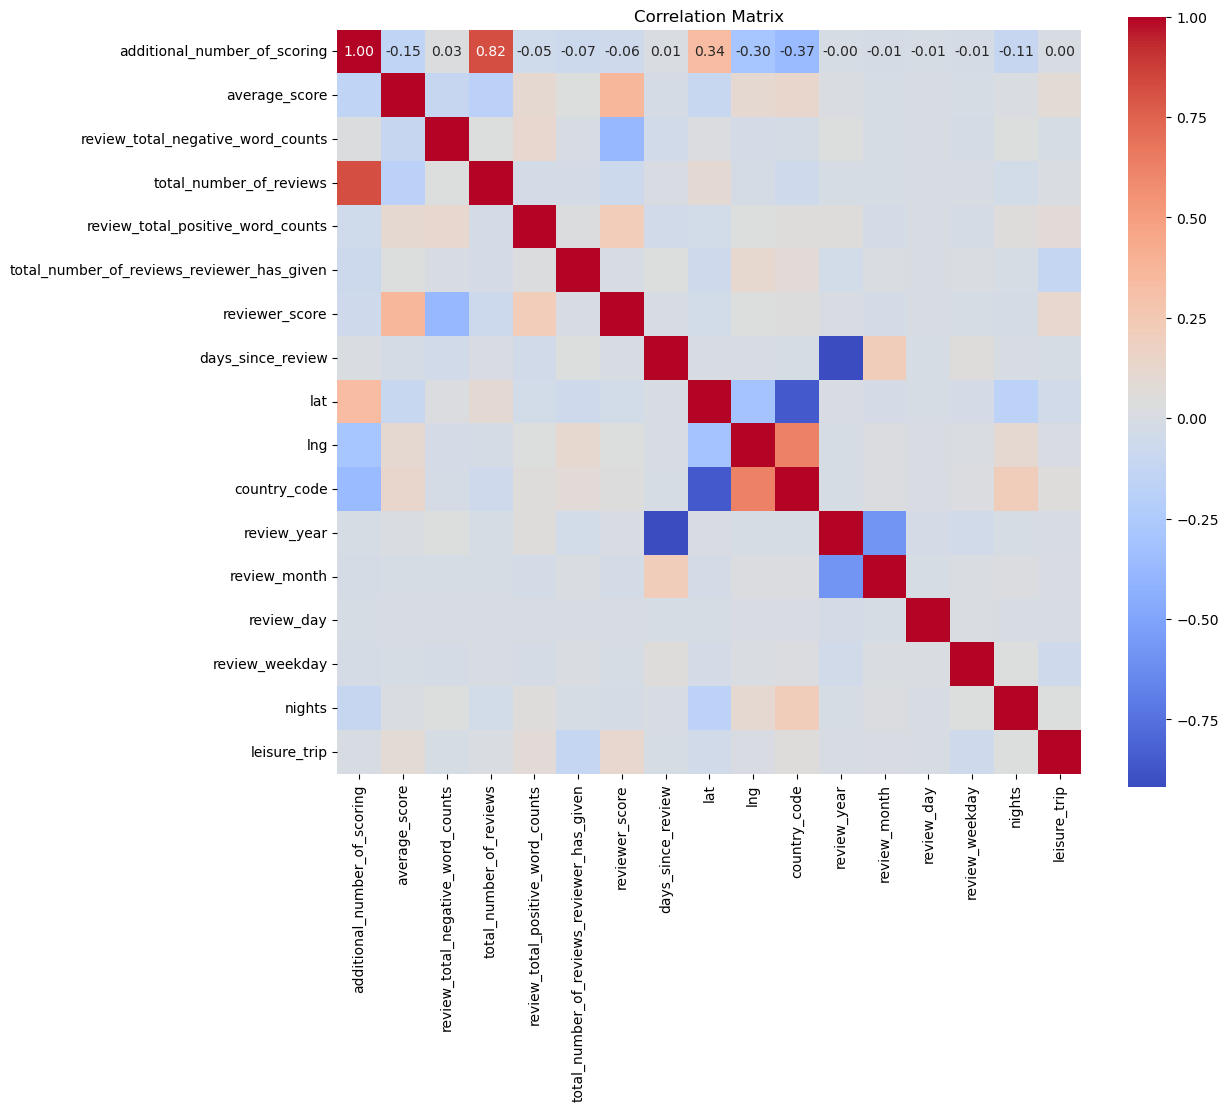

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем матрицу корреляций
corr = hotels.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()



In [70]:
# Нахождение пар признаков с |corr| > 0.7
pairs = (corr.abs().unstack()
         .sort_values(ascending=False)
         .drop_duplicates())

# Фильтрация пар с корреляцией >= 0.7 или <= -0.7
strong_pairs = pairs[(pairs > 0.7) | (pairs < -0.7)]

# Вывод сильных пар
print("Сильные пары признаков с корреляцией |corr| > 0.7:")
print(strong_pairs)


Сильные пары признаков с корреляцией |corr| > 0.7:
additional_number_of_scoring  additional_number_of_scoring    1.000000
review_year                   days_since_review               0.917355
country_code                  lat                             0.850244
total_number_of_reviews       additional_number_of_scoring    0.824467
dtype: float64


In [71]:
hotels = hotels.drop(columns=['review_year', 'country_code', 'additional_number_of_scoring'])

In [72]:
hotels.head()

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,review_month,review_day,review_weekday,nights,leisure_trip
0,8.4,3.0,1994.0,4.0,7.0,10.0,531.0,51.507894,-0.143671,2,19,4,2.0,1.0
1,8.3,3.0,1361.0,2.0,14.0,6.3,203.0,51.521009,-0.123097,1,12,3,1.0,0.0
2,8.9,6.0,406.0,0.0,14.0,7.5,289.0,48.845377,2.325643,10,18,1,3.0,1.0
3,7.5,0.0,607.0,11.0,8.0,10.0,681.0,48.888697,2.394540,9,22,1,1.0,1.0
4,8.5,4.0,7586.0,20.0,10.0,9.6,516.0,52.385601,4.847060,3,5,5,6.0,0.0


In [73]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [74]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split

In [75]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

In [77]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13644801335944076
